# Efficient Frontier Part I

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

%matplotlib inline
## %matplotlib inline : facilitates plotting matplotlib
## graphs just below code cells and storing them in the 
## notebook document

In [49]:
## PG = Proctor and Gamble
## ^GSPC = S & P 500

assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()

for a  in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [50]:
pf_data.tail()

,PG,^GSPC
Date,,
2022-08-16,149.929993,4305.200195
2022-08-17,149.240005,4274.040039
2022-08-18,149.770004,4283.740234
2022-08-19,149.729996,4228.479980
2022-08-22,149.750000,4139.169922


<AxesSubplot:xlabel='Date'>

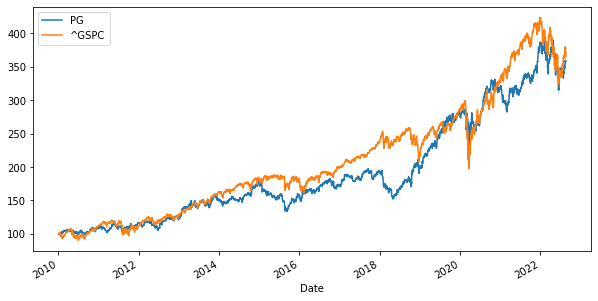

In [51]:
## Normalize returns to 100

(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [52]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [53]:
## Average annual returns
log_returns.mean() * 250

PG       0.100445
^GSPC    0.101858
dtype: float64

In [54]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029866,0.017195
^GSPC,0.017195,0.030840


In [55]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.566581
^GSPC,0.566581,1.000000


In [56]:
num_assets = len(assets)

In [57]:
num_assets

2

In [58]:
arr = np.random.random (2)
arr

array([0.29193903, 0.05944705])

In [59]:
arr[0] + arr[1]

0.3513860776958939

In [60]:
## the trick is to introduce incrementing

weights = np.random.random(num_assets)
weights /= np.sum(weights)
## the above line represents 
## w = w/sum(w)
## where w = [w1,w2]
## so, w1/(w1+w2) + w2/(w1+w2)
weights

array([0.28018964, 0.71981036])

In [61]:
weights[0]+weights[1]

1.0

# Obtaining the Efficient Frontier Part II

### Expected Portfolio Return:

In [62]:
np.sum(weights * log_returns.mean()) * 250

0.10146210624666153

### Expected Portfolio Variance:

In [63]:
np.dot(weights.T, np.dot(log_returns.cov() *250, weights))

0.025259916282166953

### Expected Portfolio Volatility:

In [64]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.15893368517141654

In [ ]:
## In the following simulation:
## We are not considering 1,000 different investments
## Rather, we are considering 1,000 different
## combinations of the same asset

## We simulate 1,000 combinations of S&P 500 and PG



In [65]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) *250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.10137034002473354,
  0.10126273001299181,
  0.10103558760871058,
  0.10072042736841531,
  0.10063604922824443,
  0.10177599415942193,
  0.1012245107605624,
  0.1011902194122127,
  0.10147168571354946,
  0.10128527825307775,
  0.10125893520198341,
  0.1012109519637068,
  0.10153465153772571,
  0.10108144971853147,
  0.10088667143579721,
  0.10049293063167242,
  0.10102256727699345,
  0.10131382381478257,
  0.10100574203678617,
  0.10127745777259975,
  0.10121817542254975,
  0.10087170876073998,
  0.10154993873194715,
  0.10160972506922418,
  0.10114070053127376,
  0.10136480137116415,
  0.10168671705288022,
  0.10051480028156722,
  0.10083722582763013,
  0.10147844322704756,
  0.10082874527868564,
  0.10133561768845904,
  0.10105314604988712,
  0.10141793600016594,
  0.10108545132319918,
  0.10145985598025652,
  0.10109871320142778,
  0.10071310963598816,
  0.10074305099483477,
  0.10068526865715435,
  0.10062310303022483,
  0.10113927563847308,
  0.10073379200270416,
  0.1011045077

In [66]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) *250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.10093409, 0.10122198, 0.10125191, 0.10118391, 0.10162952,
        0.10131319, 0.10061671, 0.1014201 , 0.10115483, 0.10121138,
        0.10172962, 0.10124193, 0.10142251, 0.10093226, 0.10122337,
        0.10119863, 0.10085502, 0.10153632, 0.10159937, 0.10064977,
        0.10096879, 0.10079367, 0.10063288, 0.1017428 , 0.10115282,
        0.10098099, 0.10132998, 0.1015271 , 0.10142583, 0.10096718,
        0.10116761, 0.10094212, 0.10052452, 0.10059248, 0.10108443,
        0.10143906, 0.10083025, 0.10120152, 0.10126861, 0.10161781,
        0.10091668, 0.10092957, 0.10147351, 0.10139031, 0.10092764,
        0.1004457 , 0.10114443, 0.10117735, 0.10154906, 0.10089662,
        0.10114996, 0.10139317, 0.10159818, 0.10152037, 0.10180864,
        0.10056763, 0.10121197, 0.10112947, 0.10106117, 0.10109444,
        0.10172944, 0.10115157, 0.10108465, 0.10077225, 0.10154877,
        0.10098428, 0.1008008 , 0.1013687 , 0.10059518, 0.1005775 ,
        0.10095894, 0.10135333, 0.10154005, 0.10

# Obtaining the Efficient Frontier Part III

In [67]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [43]:
portfolios.head()

,Return,Volatility
0,0.104204,0.169689
1,0.102977,0.155709
2,0.100825,0.166950
3,0.103920,0.165265
4,0.102631,0.154378


In [44]:
portfolios.tail()

,Return,Volatility
995,0.102960,0.155615
996,0.103202,0.157227
997,0.101913,0.155541
998,0.103176,0.157024
999,0.102376,0.154181


Text(0, 0.5, 'Expected Return')

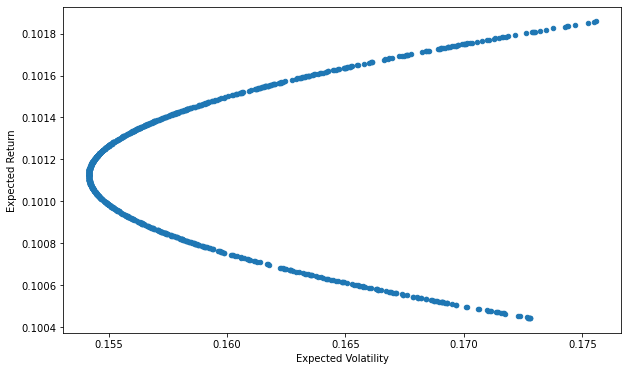

In [68]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')